# I) Imports and data

## Imports

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Import statements required for Plotly 
import plotly.offline as py
import plotly.graph_objs as go

## Data processing

In [22]:
df = pd.read_csv('data/data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [23]:
# Dropping columns
df = df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "RelationshipSatisfaction", "StandardHours"], axis = 1)

# Formatting columns

df['Attrition'] = df['Attrition'].replace(["Yes", "No"], [1, 0])
df['Gender'] = df['Gender'].replace(["Male", "Female"], [0, 1])
df['OverTime'] = df['OverTime'].replace(["Yes", "No"], [1, 0])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,...,11,3,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,...,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,...,15,3,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,...,12,3,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,0,...,17,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,0,...,15,3,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,0,...,20,4,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,0,...,14,3,0,17,3,2,9,6,0,8


#### Distribution of Attrition values :

In [24]:
# creating a list of only numerical values
numerical = [u'Attrition', u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
heatmap = [
    go.Heatmap(
        z= df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=heatmap, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [25]:


# 1-Hot Encoding

size = len(df)

print(size)
print(df)

travel_frequently = []
travel_rarely = []
non_travel = []

research = []
sales = []
human = []

life_sciences = []
medical = []
marketing = []
technical = []
other = []

sales_executive = []
research_scientist = []
laboratory_technician = []
manufacturing_director = []
healthcare_representative = []

married = []
single = []
divorced = []

for index in range(size):
    travel_status = df["BusinessTravel"][index]
    department_status = df["Department"][index]
    education_status = df["EducationField"][index]
    jobRole_status = df["JobRole"][index]
    marital_status = df["MaritalStatus"][index]
    
    if travel_status == "Travel_Frequently":
        travel_frequently.append(1)
        travel_rarely.append(0)
        non_travel.append(0)
    elif travel_status == "Travel_Rarely":
        travel_frequently.append(0)
        travel_rarely.append(1)
        non_travel.append(0)
    else:
        travel_frequently.append(0)
        travel_rarely.append(0)
        non_travel.append(1)
        
    if department_status == "Research & Development":
        research.append(1)
        sales.append(0)
        human.append(0)
    elif department_status == "Sales":
        research.append(0)
        sales.append(1)
        human.append(0)
    else:
        research.append(0)
        sales.append(0)
        human.append(1)
        
    if education_status == "Life Sciences":
        life_sciences.append(1)
        medical.append(0)
        marketing.append(0)
        technical.append(0)
        other.append(0)
    elif education_status == "Medical":
        life_sciences.append(0)
        medical.append(1)
        marketing.append(0)
        technical.append(0)
        other.append(0)
    elif education_status == "Marketing":
        life_sciences.append(0)
        medical.append(0)
        marketing.append(1)
        technical.append(0)
        other.append(0)
    elif education_status == "Technical Degree":
        life_sciences.append(0)
        medical.append(0)
        marketing.append(0)
        technical.append(1)
        other.append(0)
    else:
        life_sciences.append(0)
        medical.append(0)
        marketing.append(0)
        technical.append(0)
        other.append(1)
    
    if jobRole_status == "Sales Executive":
        sales_executive.append(1)
        research_scientist.append(0)
        laboratory_technician.append(0)
        manufacturing_director.append(0)
        healthcare_representative.append(0)
    elif jobRole_status == "Research Scientist":
        sales_executive.append(0)
        research_scientist.append(1)
        laboratory_technician.append(0)
        manufacturing_director.append(0)
        healthcare_representative.append(0)
    elif jobRole_status == "Laboratory Technician":
        sales_executive.append(0)
        research_scientist.append(0)
        laboratory_technician.append(1)
        manufacturing_director.append(0)
        healthcare_representative.append(0)
    elif jobRole_status == "Manufacturing Director":
        sales_executive.append(0)
        research_scientist.append(0)
        laboratory_technician.append(0)
        manufacturing_director.append(1)
        healthcare_representative.append(0)
    else:
        sales_executive.append(0)
        research_scientist.append(0)
        laboratory_technician.append(0)
        manufacturing_director.append(0)
        healthcare_representative.append(1)
        
    if marital_status == "Married":
        married.append(1)
        single.append(0)
        divorced.append(0)
    elif marital_status == "Single":
        married.append(0)
        single.append(1)
        divorced.append(0)
    else:
        married.append(0)
        single.append(0)
        divorced.append(1)
        
        

business_index = df.columns.get_loc("BusinessTravel")
df = df.drop("BusinessTravel", axis = 1)
df.insert(business_index, "Non_Travel", non_travel)
df.insert(business_index, "Travel_Rarely", travel_rarely)
df.insert(business_index, "Travel_Frequently", travel_frequently)

department_index = df.columns.get_loc("Department")
df = df.drop("Department", axis = 1)
df.insert(department_index, "Human Resources", human)
df.insert(department_index, "Sales", sales)
df.insert(department_index, "Research & Development", research)

education_index = df.columns.get_loc("EducationField")
df = df.drop("EducationField", axis = 1)
df.insert(education_index, "EducationOther", other)
df.insert(education_index, "Technical Degree", technical)
df.insert(education_index, "Marketing", marketing)
df.insert(education_index, "Medical", medical)
df.insert(education_index, "Life Sciences", life_sciences)

jobRole_index = df.columns.get_loc("JobRole")
df = df.drop("JobRole", axis = 1)
df.insert(jobRole_index, "Healthcare Representative", healthcare_representative)
df.insert(jobRole_index, "Manufacturing Director", manufacturing_director)
df.insert(jobRole_index, "Laboratory Technician", laboratory_technician)
df.insert(jobRole_index, "Research Scientist", research_scientist)
df.insert(jobRole_index, "Sales Executive", sales_executive)

marital_index = df.columns.get_loc("MaritalStatus")
df = df.drop("MaritalStatus", axis = 1)
df.insert(marital_index, "Divorced", divorced)
df.insert(marital_index, "Single", single)
df.insert(marital_index, "Married", married)

1470
      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  Environm

In [26]:
train, test = train_test_split(df, test_size=0.2)

In [27]:
train

,Age,Attrition,Travel_Frequently,Travel_Rarely,Non_Travel,DailyRate,Research & Development,Sales,Human Resources,DistanceFromHome,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
496,21,0,0,1,0,1343,0,1,0,22,...,11,3,0,3,2,3,3,2,1,2
673,33,0,0,1,0,1198,1,0,0,1,...,11,3,0,6,1,3,3,2,0,2
1297,26,1,0,1,0,920,0,0,1,20,...,11,3,0,6,3,3,5,1,1,4
1068,28,1,1,0,0,289,1,0,0,2,...,11,3,0,8,2,2,0,0,0,0
915,21,1,1,0,0,251,1,0,0,10,...,20,4,0,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,28,0,0,1,0,1169,0,0,1,8,...,13,3,1,6,6,3,5,1,0,4
1183,36,0,0,1,0,1040,1,0,0,3,...,20,4,1,13,3,3,5,4,0,4
134,26,0,0,1,0,1355,0,0,1,25,...,23,4,1,8,3,3,8,7,5,7
153,45,0,0,1,0,194,1,0,0,9,...,18,3,1,20,2,1,17,9,0,15


In [28]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)

#### Checking for null values

In [29]:
display(df.isnull().any())

Age                          False
Attrition                    False
Travel_Frequently            False
Travel_Rarely                False
Non_Travel                   False
DailyRate                    False
Research & Development       False
Sales                        False
Human Resources              False
DistanceFromHome             False
Education                    False
Life Sciences                False
Medical                      False
Marketing                    False
Technical Degree             False
EducationOther               False
EnvironmentSatisfaction      False
Gender                       False
HourlyRate                   False
JobInvolvement               False
JobLevel                     False
Sales Executive              False
Research Scientist           False
Laboratory Technician        False
Manufacturing Director       False
Healthcare Representative    False
JobSatisfaction              False
Married                      False
Single              

In [30]:
for col in test.columns:
    print(f"{col} : {test[col].unique()}")

Age : [43 45 35 30 25 28 40 34 50 41 39 44 24 29 32 31 21 23 38 22 37 42 27 33
 26 49 36 47 51 48 18 46 56 59 55 20 53 52 57 58 54]
Attrition : [1 0]
Travel_Frequently : [1 0]
Travel_Rarely : [0 1]
Non_Travel : [0 1]
DailyRate : [ 807 1268 1029  252  946  882  193  300 1065  691 1339 1137 1200 1440
  735  443 1094  381  567  352 1089 1112  678  995 1082 1210  391  650
  135  759  561  935  976  583  470  322  670 1294 1495  471  142  179
  192  634 1329  288  176 1309  866  414 1054  267  479  535 1332 1099
  429 1256  810  461  589  702  426 1107 1186 1098  896  676 1427 1125
  329  977  249 1178  507  342  141  855 1398  665 1469 1413  806 1055
 1449  264 1050  230  116 1316 1217 1009 1351 1369  788  317 1086 1092
  185  688 1383 1435 1079  981  433 1169  536  617 1431  920 1130  345
 1245  970 1441  943  147 1485  335 1253 1117  350 1040  590  240  836
  509  959  486  809  495 1251 1168  975 1015 1102  119  427  603 1030
  790  474 1005 1319 1372  258 1199  750  992 1403  580  945 

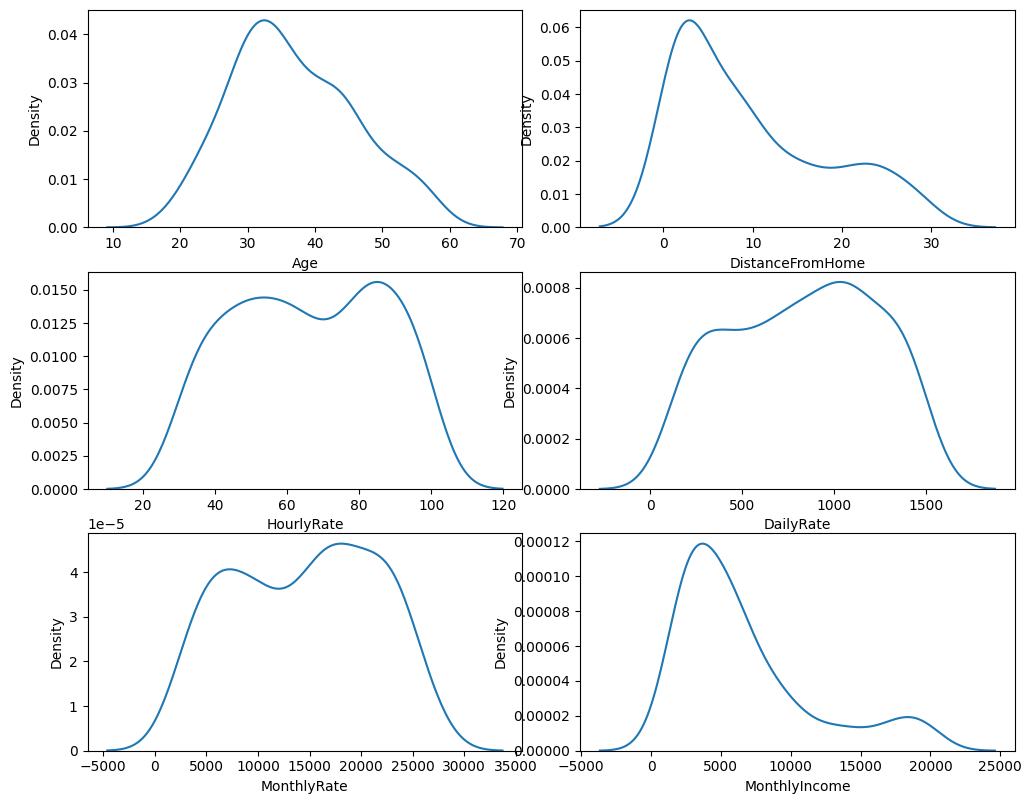

In [31]:
f, axes = plt.subplots(3, 2, figsize=(10, 8))
plt.tight_layout()
sns.kdeplot(test["Age"], ax=axes[0,0])
sns.kdeplot(test["DistanceFromHome"], ax=axes[0,1])
sns.kdeplot(test["HourlyRate"], ax=axes[1,0])
sns.kdeplot(test["DailyRate"], ax=axes[1,1])
sns.kdeplot(test["MonthlyRate"], ax=axes[2,0])
sns.kdeplot(test["MonthlyIncome"], ax=axes[2,1])
plt.show()

#### Régression Logistique

In [33]:
model = LogisticRegression(max_iter = 8000)

train_y = train["Attrition"]
train_y = train_y.ravel()
train_x = train.drop("Attrition", axis = 1)

skf = StratifiedKFold(n_splits = 5)
index = 1

for train_sample, validation_sample in skf.split(train_x, train_y):
    X_train, X_validation = [train_x.iloc[[i]] for i in train_sample], [train_x.iloc[[i]] for i in validation_sample]
    Y_train, Y_validation = [train_y[i] for i in train_sample], [train_y[i] for i in validation_sample]

    n_samples, n_x, n_y = np.shape(X_train)
    X_train = np.reshape(X_train, (n_samples, n_x * n_y))

    n_samples, n_x, n_y = np.shape(X_validation)
    X_validation = np.reshape(X_validation, (n_samples, n_x * n_y))

    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)

    score = f1_score(Y_validation, predictions)

    print("Index: ", index)
    print("Predictions: ", predictions)
    print("Validation: ", Y_validation)
    print("F1-score: ", score)

    index += 1

Index:  1
Predictions:  [0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Validation:  [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,